In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [2]:
%run ./module_P2_utils.ipynb

In [3]:
# df = pd.read_csv("./tmp/df_03_quali.csv")
df = pd.read_pickle("./tmp/df_03_quali.gzip")

Correlation btw 'nutriscore_score' and 'additives_n'

'contingency table'


***

# Analysis focused on Quantitative features

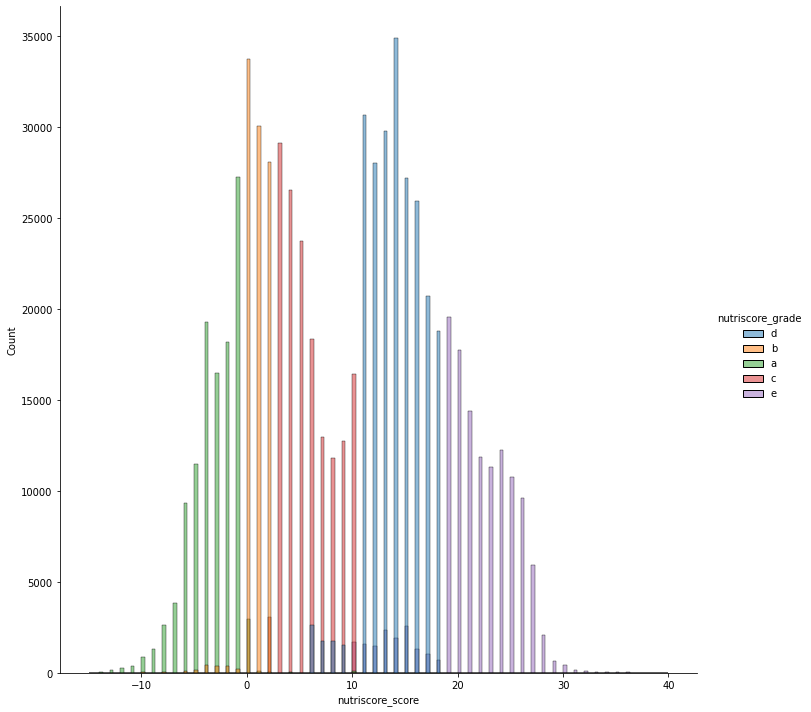

In [4]:
sns.displot(data=df, hue='nutriscore_grade', x='nutriscore_score', height=10)

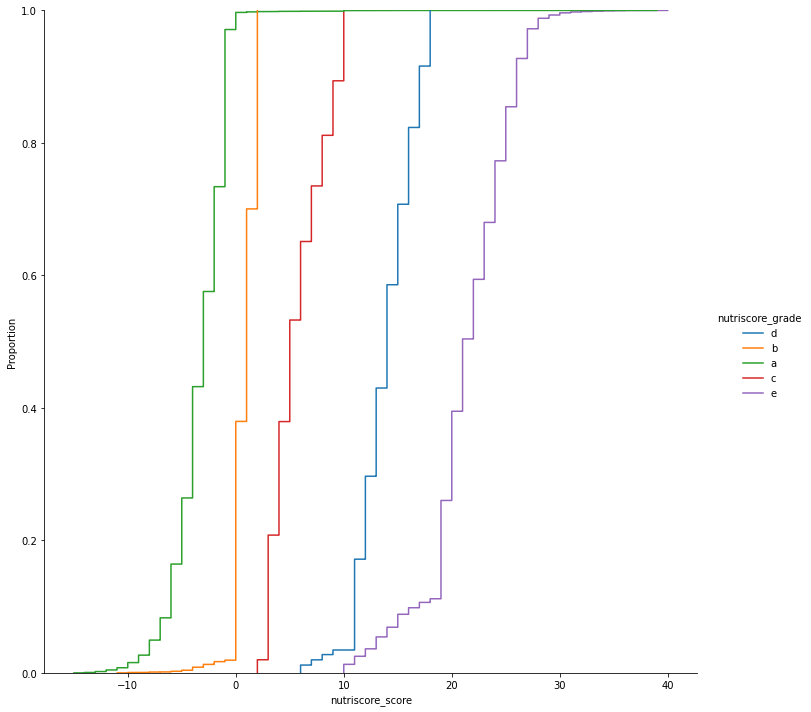

In [5]:
sns.displot(data=df, hue='nutriscore_grade', x='nutriscore_score',kind='ecdf', height=10)

We can see nutriscore grade and score may be correlated, but some values are overlapping, so we may expect it difficult to make any projections thanks to it.

### Correlations between features

Let's use the Pearson Correlation coefficient for our analysis of correlation

For convenience and further analysis, we use absolute values.

In [6]:
correlations = df.select_dtypes('float').corr(method="pearson")
correlations = np.abs(correlations)
correlations

additives_n  nutriscore_score  energy-kcal_100g  \
additives_n                 1.000000          0.190459          0.071430   
nutriscore_score            0.190459          1.000000          0.514700   
energy-kcal_100g            0.071430          0.514700          1.000000   
energy_100g                 0.093512          0.578320          0.967918   
fat_100g                    0.072095          0.665422          0.704853   
saturated-fat_100g          0.136921          0.613796          0.561156   
carbohydrates_100g          0.178189          0.242438          0.530611   
sugars_100g                 0.161570          0.182483          0.229331   
proteins_100g               0.019509          0.039889          0.397280   
salt_100g                   0.111630          0.284026          0.266109   
sodium_100g                 0.111616          0.284033          0.266115   
nutrition-score-fr_100g     0.295180          1.000000          0.366878   

                         energy_100g  fat_100g  saturated-fat_100g  \
additives_n                 0.093512  0.072095            0.136921   
nutriscore_score            0.578320  0.665422            0.613796   
energy-kcal_100g            0.967918  0.704853            0.561156   
energy_100g                 1.000000  0.731808            0.575508   
fat_100g                    0.731808  1.000000            0.751978   
saturated-fat_100g          0.575508  0.751978            1.000000   
carbohydrates_100g          0.567977  0.197372            0.148301   
sugars_100g                 0.249252  0.158036            0.245613   
proteins_100g               0.426721  0.466061            0.396212   
salt_100g                   0.287247  0.410890            0.350178   
sodium_100g                 0.287243  0.410882            0.350169   
nutrition-score-fr_100g     0.401921  0.448845            0.429571   

                         carbohydrates_100g  sugars_100g  proteins_100g  \
additives_n                        0.178189     0.161570       0.019509   
nutriscore_score                   0.242438     0.182483       0.039889   
energy-kcal_100g                   0.530611     0.229331       0.397280   
energy_100g                        0.567977     0.249252       0.426721   
fat_100g                           0.197372     0.158036       0.466061   
saturated-fat_100g                 0.148301     0.245613       0.396212   
carbohydrates_100g                 1.000000     0.433564       0.095887   
sugars_100g                        0.433564     1.000000       0.000709   
proteins_100g                      0.095887     0.000709       1.000000   
salt_100g                          0.046723     0.008925       0.490704   
sodium_100g                        0.046708     0.008924       0.490712   
nutrition-score-fr_100g            0.206928     0.191573       0.147946   

                         salt_100g  sodium_100g  nutrition-score-fr_100g  
additives_n               0.111630     0.111616                 0.295180  
nutriscore_score          0.284026     0.284033                 1.000000  
energy-kcal_100g          0.266109     0.266115                 0.366878  
energy_100g               0.287247     0.287243                 0.401921  
fat_100g                  0.410890     0.410882                 0.448845  
saturated-fat_100g        0.350178     0.350169                 0.429571  
carbohydrates_100g        0.046723     0.046708                 0.206928  
sugars_100g               0.008925     0.008924                 0.191573  
proteins_100g             0.490704     0.490712                 0.147946  
salt_100g                 1.000000     0.999988                 0.280556  
sodium_100g               0.999988     1.000000                 0.280559  
nutrition-score-fr_100g   0.280556     0.280559                 1.000000

<AxesSubplot:>

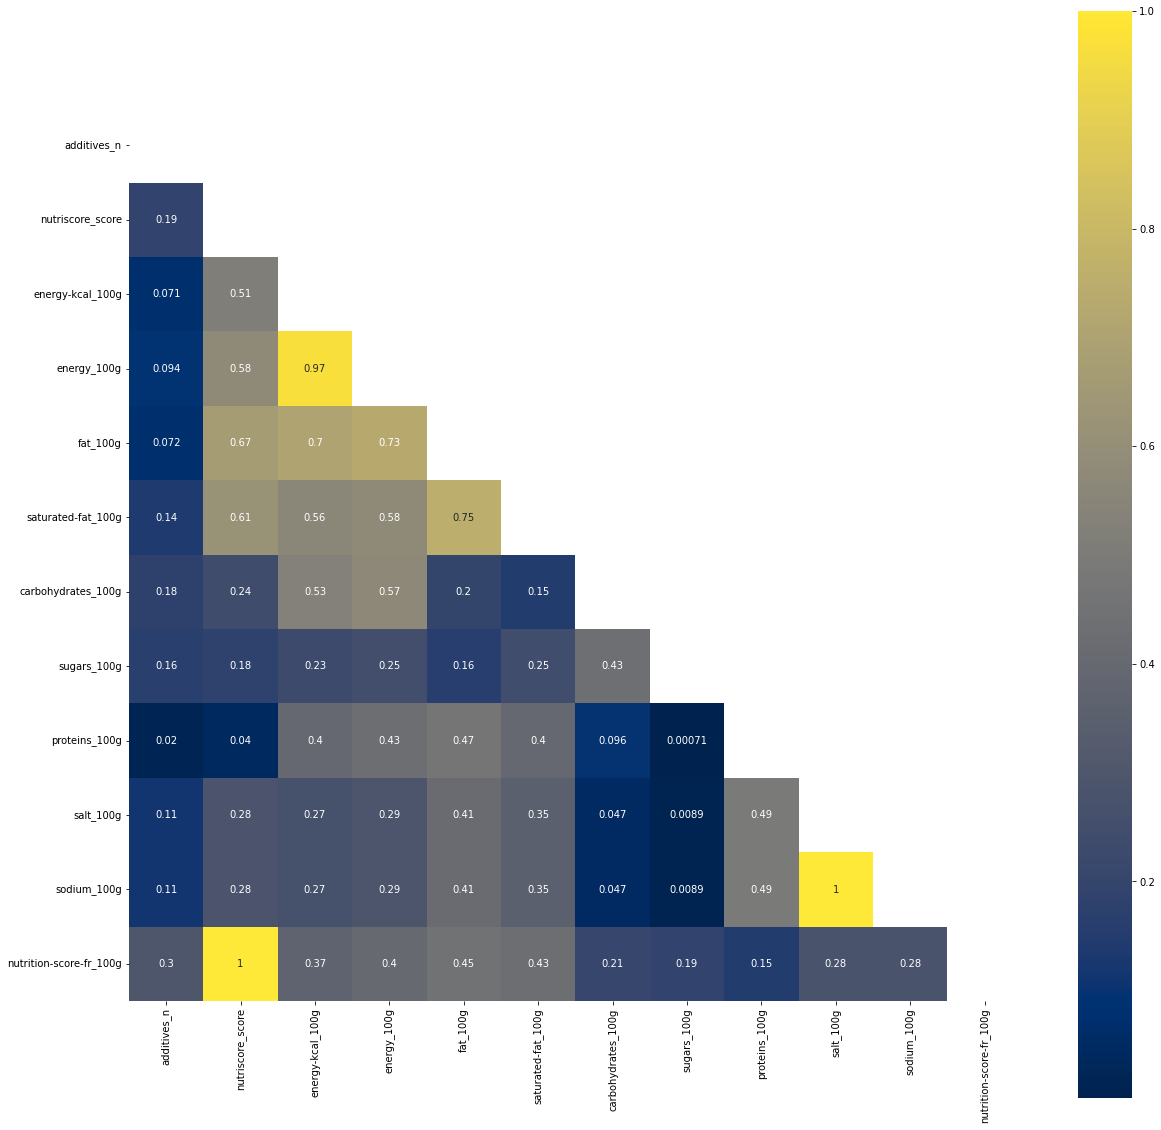

In [7]:
mask = np.zeros_like(correlations)
mask[np.triu_indices_from(mask)] = True
sns.axes_style("white")
plt.subplots(figsize=(20,20))
sns.heatmap(correlations, mask=mask, vmax=1, square=True, xticklabels=correlations.columns, yticklabels=correlations.columns, annot=True, cmap='cividis')

We consider a good correlation if corr > 0.5, and a pretty good correlation if corr > 0.3.

We can see that most correlated values are
* energy and energy-kcal
* nutriscore_score and nutriscore-score-fr
* sodium and salt

which was indeed predictable and doesn't teach us something

But, interestingly, we can see that nutriscore is well correlated with:
* saturated_fat
* fat
* energy
* energy_kcal
* nova_group

Also we can see some of the nutriments are correlated each others. By extension we may find out that nutriscore is a combination of all those nutriments.



<Figure size 1440x3600 with 0 Axes>

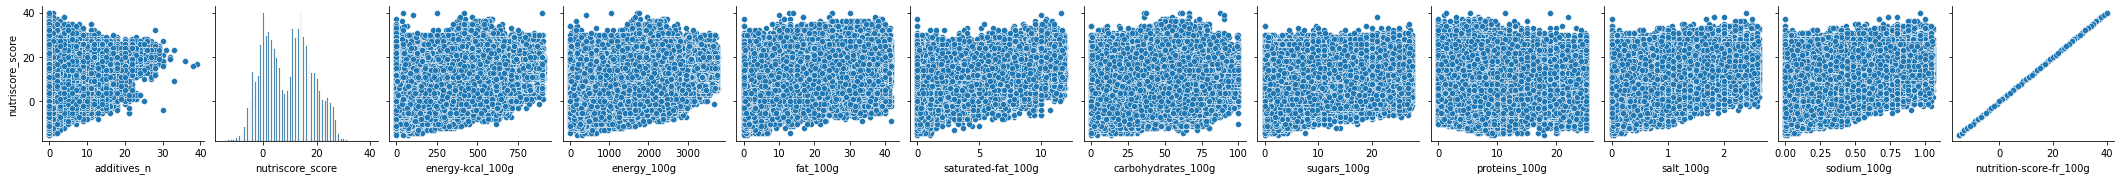

In [8]:
plt.figure(figsize=(20, 50))
sns.pairplot(df, y_vars=['nutriscore_score'], x_vars=df.select_dtypes('float') )

---

---

In [9]:
X = df.dropna().loc[:,'fat_100g'].values.reshape(-1, 1)
y = df.dropna().loc[:,'nutriscore_score'].values.reshape(-1, 1)

In [10]:
reg = LinearRegression().fit(X, y)

In [11]:
reg.coef_

array([[0.47787806]])

Score is the $ R² $ defined as $ (1 - \frac{u}{v})$, where $ u $ is the residual sum of squares `((y_true - y_pred)** 2).sum()` and $v$ is the total sum of squares `((y_true - y_true.mean()) ** 2).sum()`

In [12]:
reg.score(X, y)

0.35013393102181334

In that case, R² is not very good

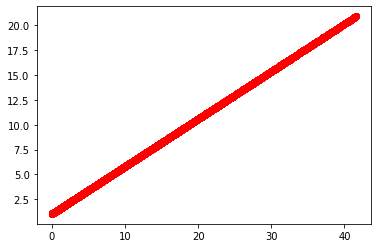

In [13]:
nutriscore_pred = reg.predict(X)
plt.scatter(df.dropna()['fat_100g'], nutriscore_pred, color='red')

We can try to make a linear regression with multiple features

In [14]:
X = df.dropna()[['fat_100g', 'energy_100g', 'sugars_100g', 'salt_100g']].to_numpy()
y = df.dropna()['nutriscore_score'].to_numpy().reshape(-1, 1)

In [15]:
reg = LinearRegression().fit(X, y)

In [16]:
reg.coef_

array([[ 3.95714541e-01, -1.66458639e-03,  4.24430079e-01,
         4.25858987e+00]])

In [17]:
reg.score(X, y)

0.5630940905208701

Here, the R² score is better, we are above 0.5

---
---

# MISC Analyses



In [18]:
pd.crosstab(df['nutriscore_grade'], df['pnns_groups_1'] )

pnns_groups_1     Alcoholic beverages  Beverages  Cereals and potatoes  \
nutriscore_grade                                                         
a                                   1       4472                 31515   
b                                   1       8780                 14229   
c                                  10       9710                 15028   
d                                  21       7383                 11844   
e                                  11      15097                  2211   

pnns_groups_1     Composite foods  Fat and sauces  Fish Meat Eggs  \
nutriscore_grade                                                    
a                            6948            2695           12563   
b                           13802            4166           12325   
c                           16981           21122           17372   
d                           12243           18644           29238   
e                            1574            9704           16569   

pnns_groups_1     Fruits and vegetables  Milk and dairy products  \
nutriscore_grade                                                   
a                                 31083                     9058   
b                                  5237                    14663   
c                                  7256                    16224   
d                                  1046                    39221   
e                                   114                     5011   

pnns_groups_1     Salty snacks  Sugary snacks  unknown  
nutriscore_grade                                        
a                         1750           1216    13582  
b                         2427           2595    15439  
c                         8723          12860    29400  
d                        12268          49794    41965  
e                         5301          57864    18470

<AxesSubplot:title={'center':'mean nutriscore for pnns_group and nutriscore_grade'}, xlabel='nutriscore_grade', ylabel='pnns_groups_1'>

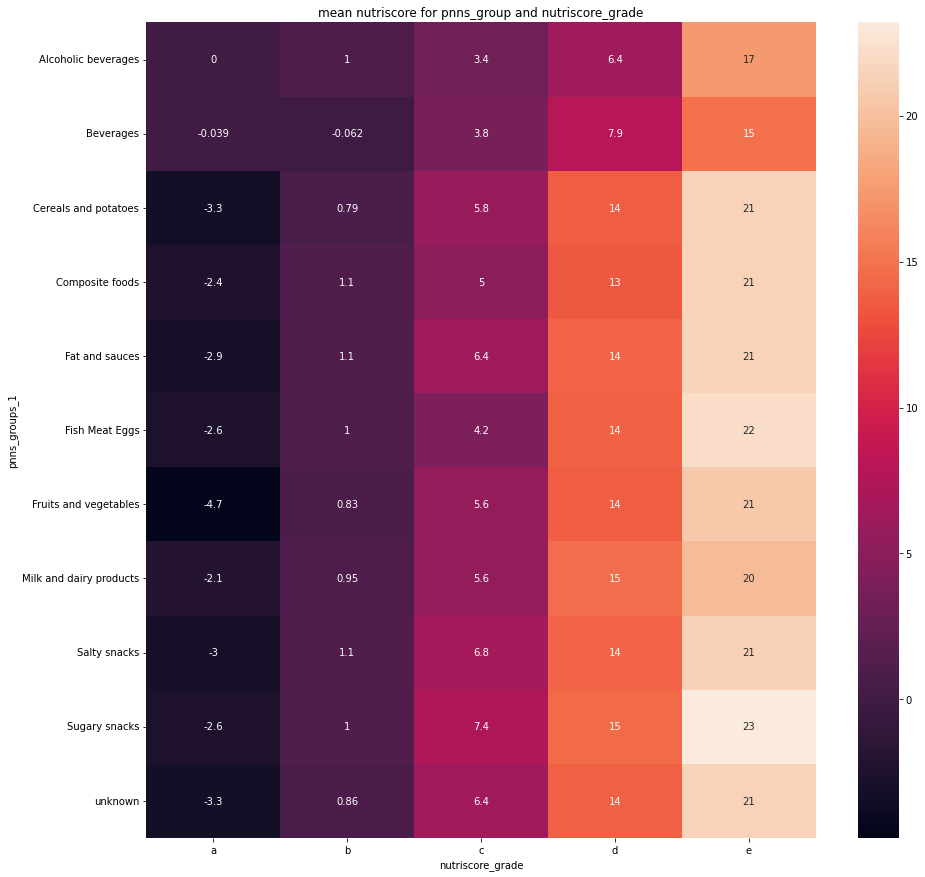

In [19]:
plt.figure(figsize=(15,15))
plt.title("mean nutriscore for pnns_group and nutriscore_grade")
sns.heatmap(df[['pnns_groups_1','nutriscore_grade', 'nutriscore_score']].pivot_table(index='pnns_groups_1', columns='nutriscore_grade', values='nutriscore_score', aggfunc=np.mean), annot=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986622 entries, 0 to 1988475
Data columns (total 39 columns):
 #   Column                                   Dtype              
---  ------                                   -----              
 0   code                                     object             
 1   creator                                  object             
 2   created_datetime                         datetime64[ns, UTC]
 3   last_modified_datetime                   datetime64[ns, UTC]
 4   product_name                             object             
 5   brands                                   object             
 6   brands_tags                              object             
 7   categories                               object             
 8   categories_tags                          object             
 9   categories_en                            object             
 10  countries                                object             
 11  countries_tags          

---
---

## Analysis focused on Qualitative features pnns


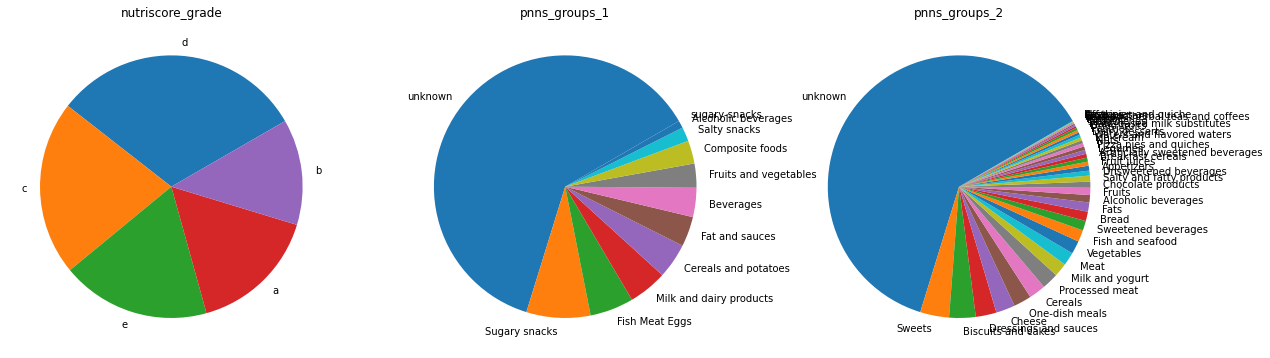

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(20, 15))

for i, col in enumerate(df[['nutriscore_grade', 'pnns_groups_1', 'pnns_groups_2']]):
    ax = axes[i % 3]
    vals = df[col].value_counts(normalize=True)
    ax.pie(vals, labels=vals.index, startangle=30)
    ax.set_title(col)

fig.subplots_adjust(wspace=.2)

Here we can see that `pnns_group1` is mainly filled with 'unknown' values (about 60%)


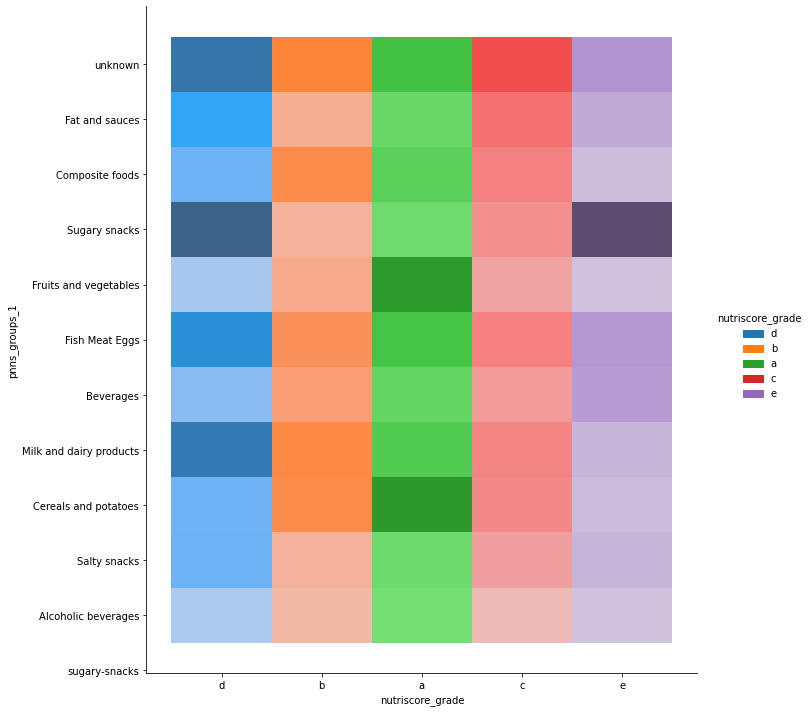

In [23]:
sns.displot(df, y='pnns_groups_1', x='nutriscore_grade', height=10, cmap='viridis', hue='nutriscore_grade')

We can see that for having a healthy meals (cat a), one would prefer to eat fruits, vegetables, cereals and potatoes.
At the opposite, having sugary snack is the worste (cat e) meal.

<Figure size 1440x1440 with 0 Axes>

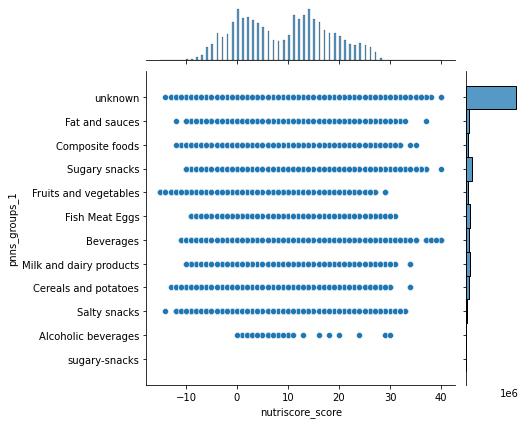

In [25]:
plt.figure(figsize=(20, 20))
sns.jointplot(data=df, x='nutriscore_score', y='pnns_groups_1')

In [21]:
pd.crosstab(df['nutriscore_grade'], df['pnns_groups_2'] )

pnns_groups_2     Alcoholic beverages  Appetizers  \
nutriscore_grade                                    
a                                   1         205   
b                                   1         573   
c                                  10        3076   
d                                  21        5576   
e                                  11        1393   

pnns_groups_2     Artificially sweetened beverages  Biscuits and cakes  Bread  \
nutriscore_grade                                                                
a                                               71                 553   4433   
b                                             1525                 939   5681   
c                                             1109                5336   6217   
d                                             1212               22170   3796   
e                                             1057               27968    293   

pnns_groups_2     Breakfast cereals  Cereals  Cheese  Chocolate products  \
nutriscore_grade                                                           
a                              2287    18745     608                   9   
b                              1270     5312     917                  21   
c                              2818     4562    3990                 142   
d                              2283     5011   32385                2065   
e                               165     1486    3721               11155   

pnns_groups_2     Dairy desserts  ...  Salty and fatty products  Sandwiches  \
nutriscore_grade                  ...                                         
a                           1140  ...                       205         308   
b                           1031  ...                       615         714   
c                           3027  ...                      2754        1119   
d                            824  ...                      5500        1648   
e                            102  ...                      3675         131   

pnns_groups_2     Soups  Sweetened beverages  Sweets  \
nutriscore_grade                                       
a                   396                   70     641   
b                  1311                  979    1583   
c                   823                  897    7099   
d                    40                 2250   23109   
e                    11                 8846   16249   

pnns_groups_2     Teas and herbal teas and coffees  Unsweetened beverages  \
nutriscore_grade                                                            
a                                                2                      0   
b                                              214                   1533   
c                                              202                   1474   
d                                              468                   1261   
e                                              251                   3278   

pnns_groups_2     Vegetables  Waters and flavored waters  unknown  
nutriscore_grade                                                   
a                      21021                        3296    13582  
b                       2094                         717    15439  
c                       1883                         119    29400  
d                        291                          50    41965  
e                         33                          36    18470  

[5 rows x 40 columns]

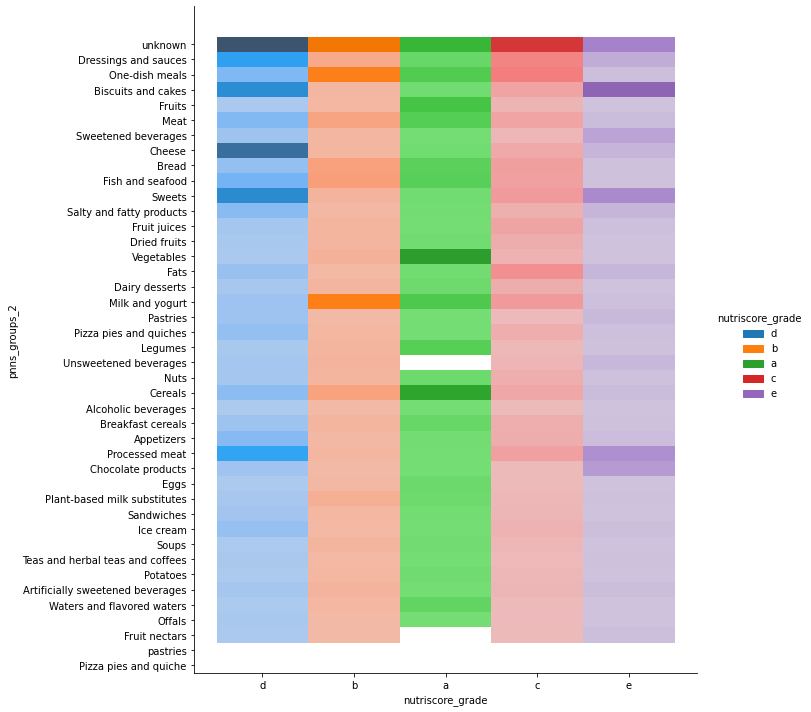

In [24]:
sns.displot(df, y='pnns_groups_2', x='nutriscore_grade', height=10, cmap='viridis', hue='nutriscore_grade')

Correlations

In [26]:
pd.crosstab(df['nutriscore_grade'], df['pnns_groups_1'])

pnns_groups_1     Alcoholic beverages  Beverages  Cereals and potatoes  \
nutriscore_grade                                                         
a                                   1       4472                 31515   
b                                   1       8780                 14229   
c                                  10       9710                 15028   
d                                  21       7383                 11844   
e                                  11      15097                  2211   

pnns_groups_1     Composite foods  Fat and sauces  Fish Meat Eggs  \
nutriscore_grade                                                    
a                            6948            2695           12563   
b                           13802            4166           12325   
c                           16981           21122           17372   
d                           12243           18644           29238   
e                            1574            9704           16569   

pnns_groups_1     Fruits and vegetables  Milk and dairy products  \
nutriscore_grade                                                   
a                                 31083                     9058   
b                                  5237                    14663   
c                                  7256                    16224   
d                                  1046                    39221   
e                                   114                     5011   

pnns_groups_1     Salty snacks  Sugary snacks  unknown  
nutriscore_grade                                        
a                         1750           1216    13582  
b                         2427           2595    15439  
c                         8723          12860    29400  
d                        12268          49794    41965  
e                         5301          57864    18470

---
---

# Analysis on Qualitative feature Countries


--------------------
FR
(277288, 39)
std         8.692939e+00
skew        1.199003e-02
kurtosis   -8.778045e-01
mean        9.924836e+00
median      1.100000e+01
var         7.556719e+01
mad         7.405905e+00
prod                 inf
sum         2.752038e+06
Name: nutriscore_score, dtype: float64


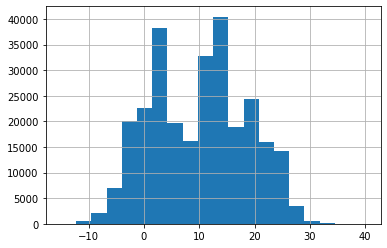

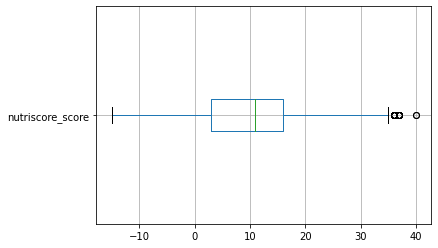

--------------------
US
(226080, 39)
std         9.072874e+00
skew       -1.082164e-01
kurtosis   -9.259125e-01
mean        9.495577e+00
median      1.100000e+01
var         8.231705e+01
mad         7.724687e+00
prod                -inf
sum         2.146760e+06
Name: nutriscore_score, dtype: float64


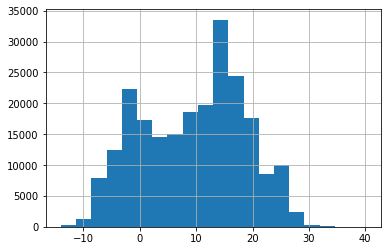

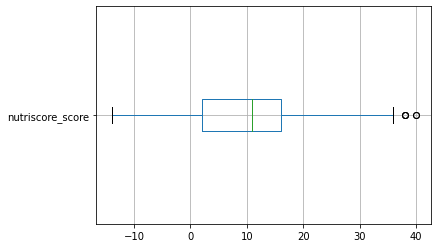

--------------------
ES
(52611, 39)
std         8.387155e+00
skew        1.725965e-01
kurtosis   -8.296576e-01
mean        9.174355e+00
median      9.000000e+00
var         7.034438e+01
mad         7.230839e+00
prod                -inf
sum         4.826720e+05
Name: nutriscore_score, dtype: float64


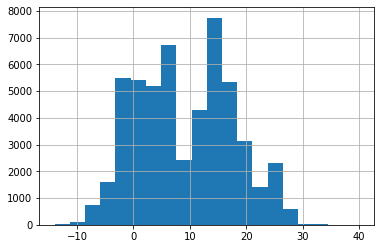

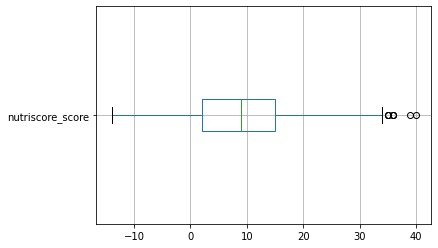

--------------------
IT
(16988, 39)
std         8.460771e+00
skew       -2.604370e-02
kurtosis   -8.645842e-01
mean        9.380504e+00
median      1.100000e+01
var         7.158465e+01
mad         7.227253e+00
prod                 inf
sum         1.593560e+05
Name: nutriscore_score, dtype: float64


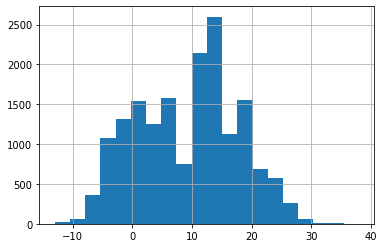

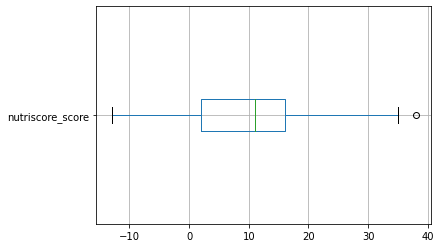

In [27]:
for i, cat in enumerate(['FR', 'US', 'ES', 'IT']):
    subset = df[df.countries_cleaned_cat == cat][df.nutriscore_score != 0].dropna(subset=['nutriscore_score'])
    getStatisticsNutriscore(subset, cat)

<AxesSubplot:xlabel='countries_cleaned', ylabel='Count'>

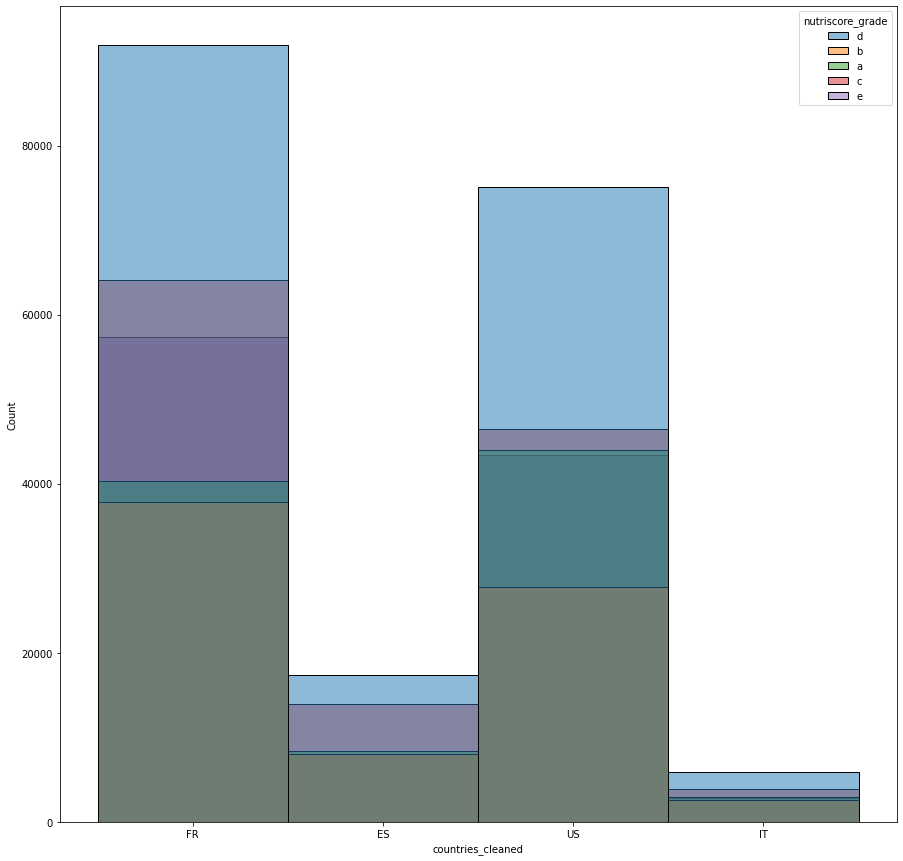

In [28]:
plt.figure(figsize=(15,15))
tmpdf = df.countries_cleaned.isin(['FR', 'US', 'ES', 'IT'])
sns.histplot(df[tmpdf], x='countries_cleaned', hue='nutriscore_grade')

---
---
# Categorization of Nutriscore_grade and correlations


In [29]:
df['nutriscore_grade_cat'] = df['nutriscore_grade'].astype('category')
df['nutriscore_grade_cat'].dropna().cat.categories
df['nutriscore_grade_cat_codes'] = df['nutriscore_grade_cat'].dropna().cat.codes
df['nutriscore_grade_cat'].dropna().cat.codes.unique()

array([3, 1, 0, 2, 4], dtype=int8)

In [30]:
pd.crosstab(df['countries_cleaned_cat'], df['nutriscore_grade'])

nutriscore_grade        a   b   c   d   e
countries_cleaned_cat                    
::                      0   1   0   0   0
AD                     10  20  18  24   8
AE                     16  19  13  16  17
AF                     16  22  35  41  24
AH                      0   0   1   1   1
...                    ..  ..  ..  ..  ..
美国                      0   0   1   0   0
西班                      0   0   0   1   0
香港                      0   4   1   4   0
대한                      1   2   0   4   3
프랑                      1   0   1   1   0

[314 rows x 5 columns]

In [31]:
df[['nutriscore_grade_cat_codes', 'nutriscore_score']].corr()

nutriscore_grade_cat_codes  nutriscore_score
nutriscore_grade_cat_codes                    1.000000          0.944613
nutriscore_score                              0.944613          1.000000

---
---

# Correlations and graphics


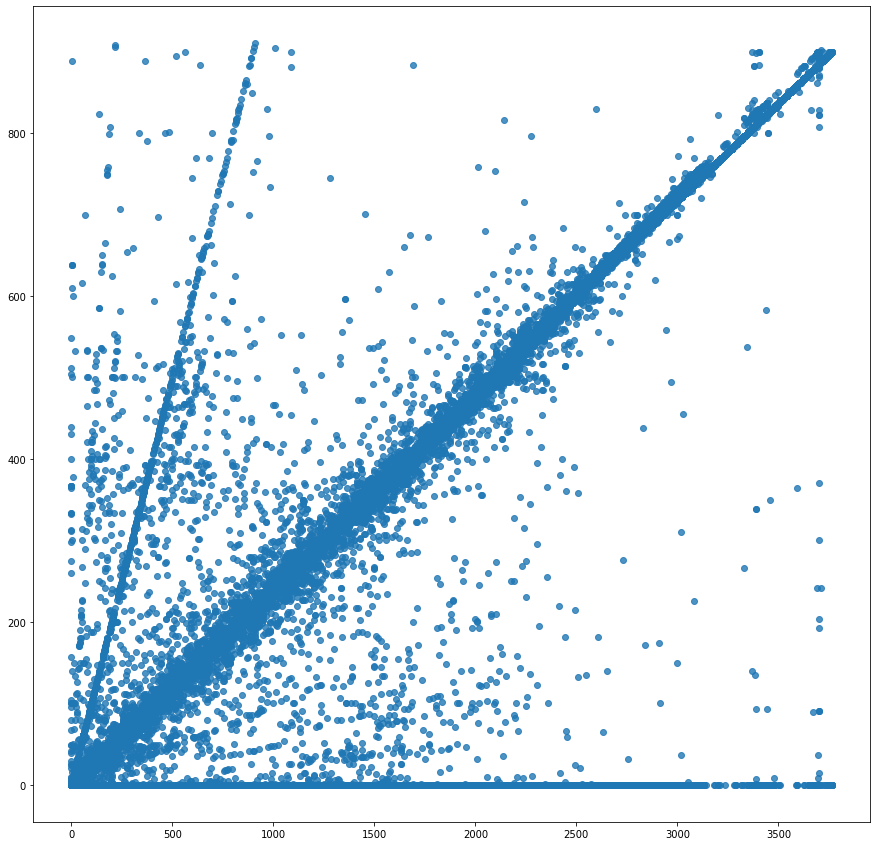

In [32]:
plt.figure(figsize=(15,15))
plt.scatter(x=df['energy_100g'], y=df['energy-kcal_100g'], alpha=0.8)

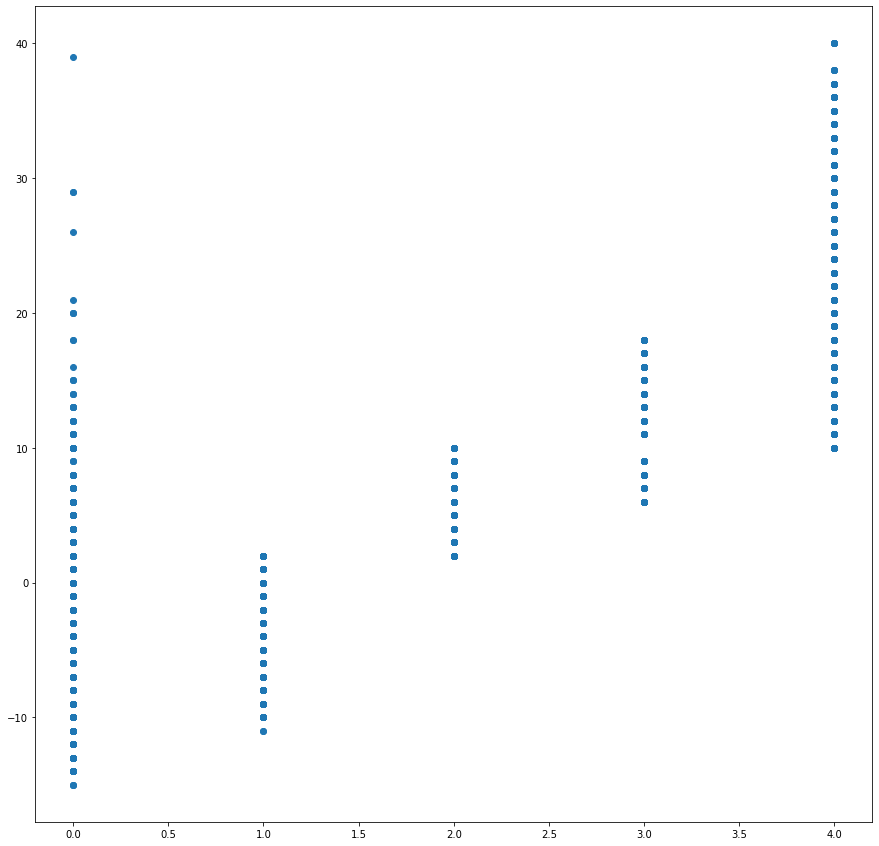

In [33]:
plt.figure(figsize=(15,15))
plt.scatter(x=df['nutriscore_grade'].astype('category').cat.codes, y=df['nutriscore_score'])

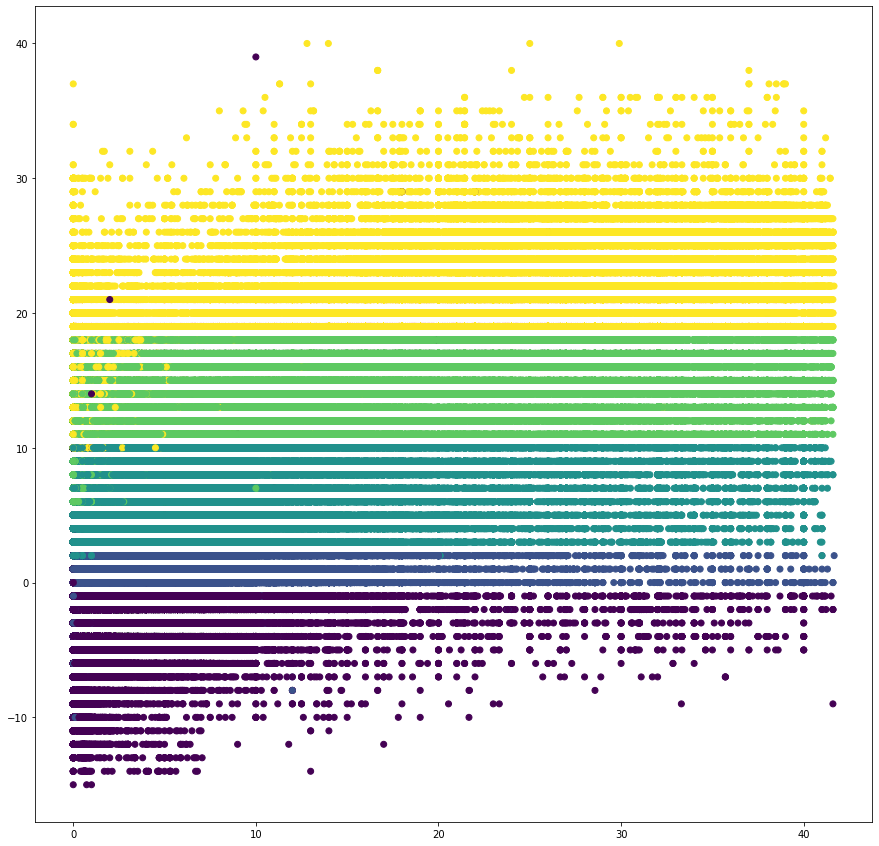

In [34]:
plt.figure(figsize=(15,15))
plt.scatter(x=df['fat_100g'], y=df['nutriscore_score'], c=df['nutriscore_grade'].astype('category').cat.codes)

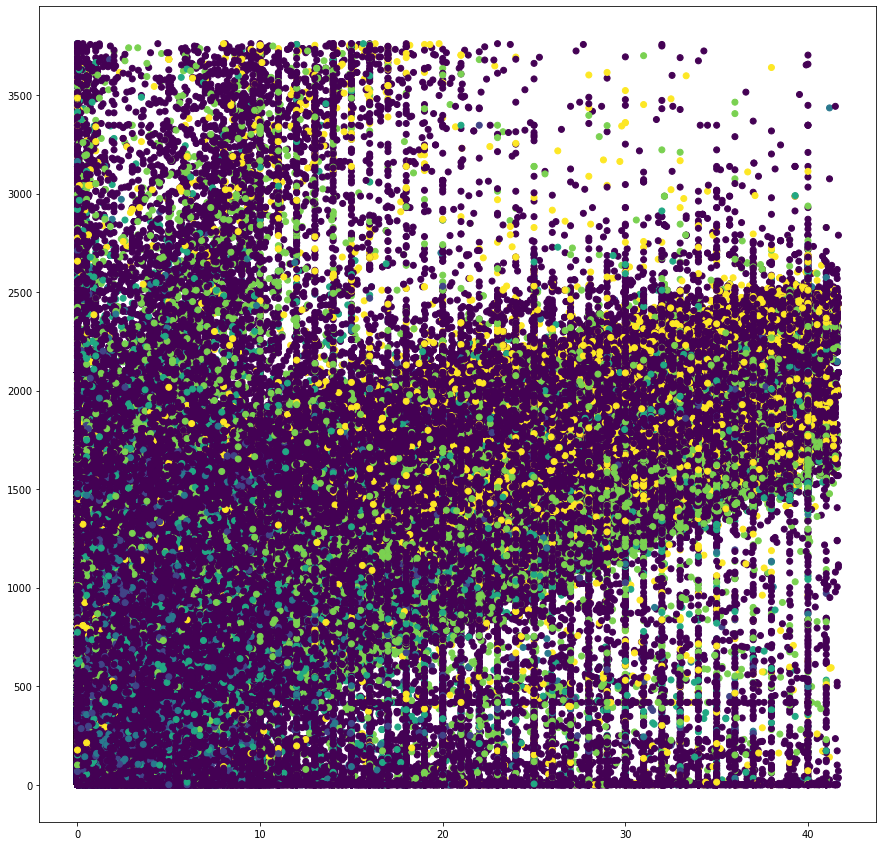

In [35]:
plt.figure(figsize=(15,15))
plt.scatter(x=df['fat_100g'], y=df['energy_100g'], c=df['nutriscore_grade'].astype('category').cat.codes)

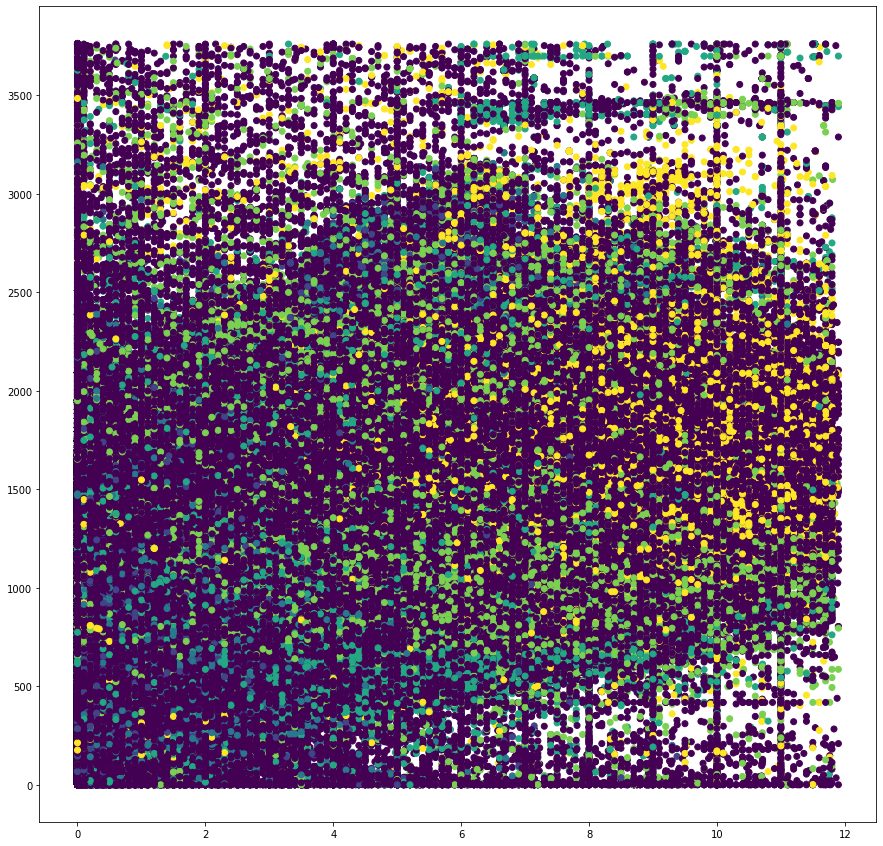

In [36]:
plt.figure(figsize=(15,15))
plt.scatter(x=df['saturated-fat_100g'], y=df['energy_100g'], c=df['nutriscore_grade'].astype('category').cat.codes)

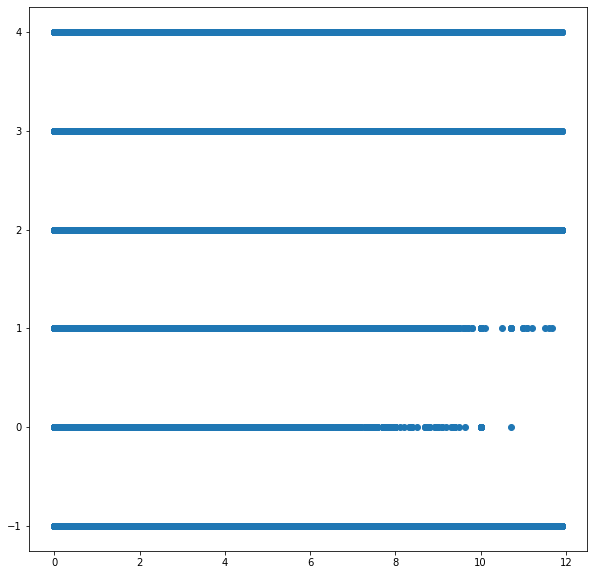

In [37]:
plt.figure(figsize=(10,10))
plt.scatter(x=df['saturated-fat_100g'], y=df['nutriscore_grade'].astype('category').cat.codes)

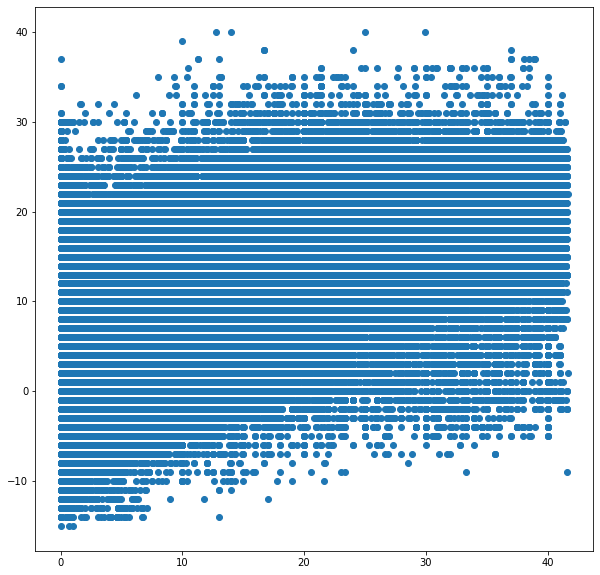

In [38]:
plt.figure(figsize=(10,10))
plt.scatter(x=df['fat_100g'], y=df['nutriscore_score'])

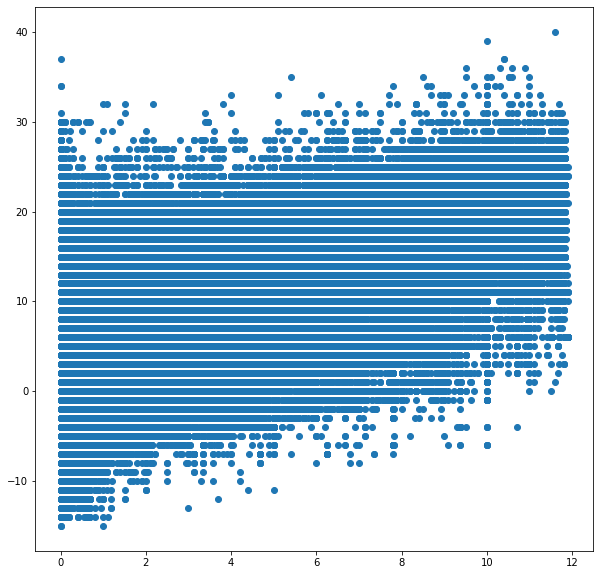

In [39]:
plt.figure(figsize=(10,10))
plt.scatter(x=df['saturated-fat_100g'], y=df['nutriscore_score'])

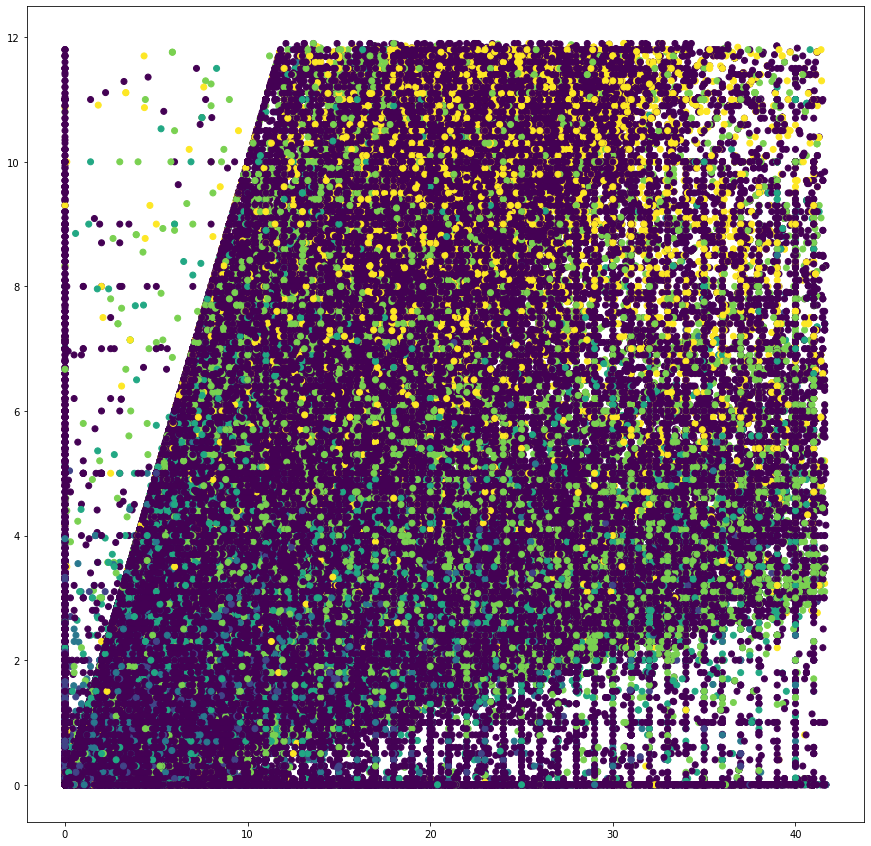

In [40]:
plt.figure(figsize=(15,15))
plt.scatter(x=df['fat_100g'], y=df['saturated-fat_100g'], c=df['nutriscore_grade'].astype('category').cat.codes)

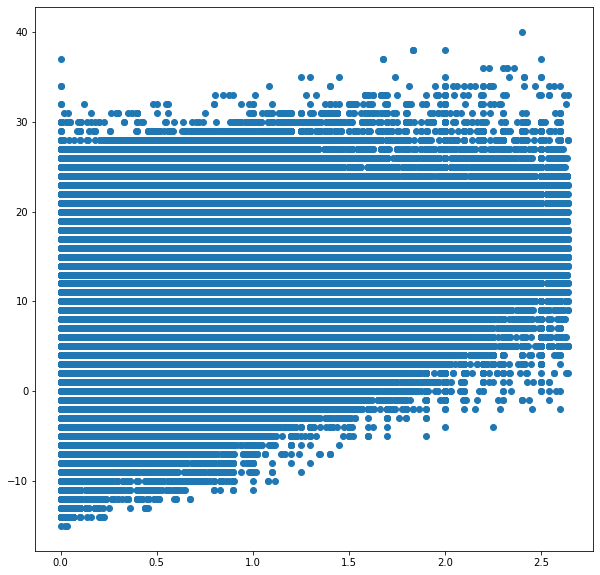

In [41]:
plt.figure(figsize=(10,10))
plt.scatter(x=df['salt_100g'], y=df['nutriscore_score'])

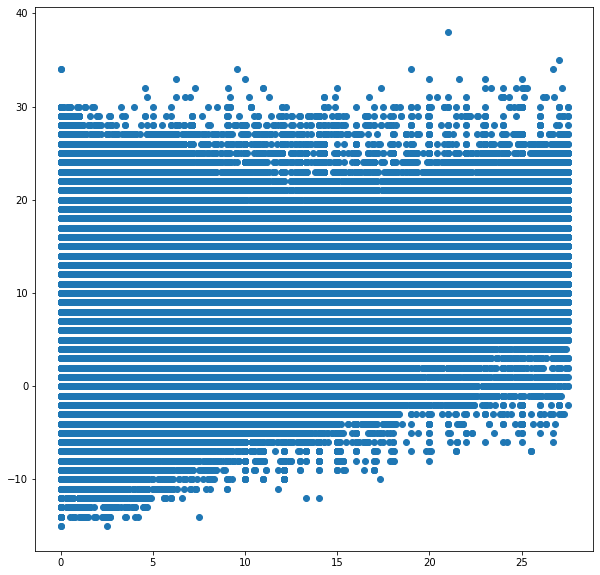

In [42]:
plt.figure(figsize=(10,10))
plt.scatter(x=df['sugars_100g'], y=df['nutriscore_score'])

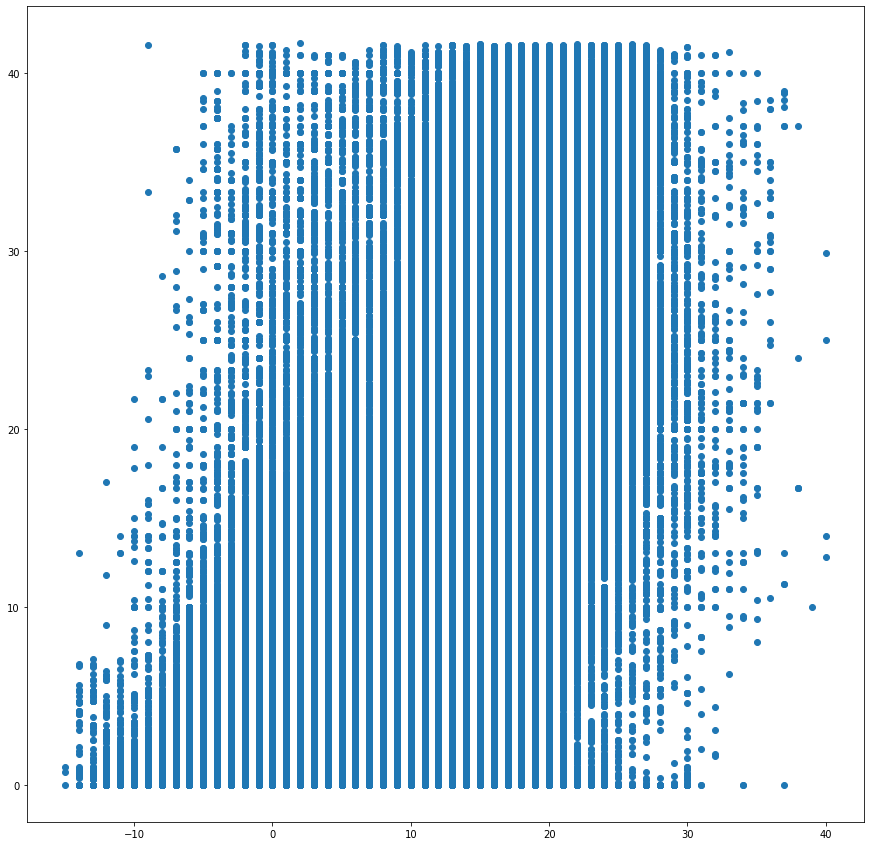

In [43]:

plt.figure(figsize=(15,15))

plt.scatter(x=df['nutriscore_score'], y=df['fat_100g'])

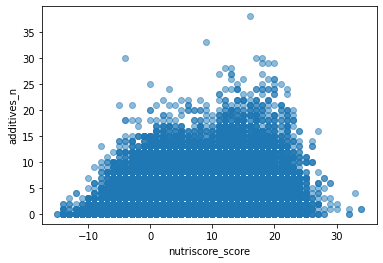

In [44]:
tmp_df = df.dropna()
plt.scatter(tmp_df['nutriscore_score'], tmp_df['additives_n'], alpha=0.5)
plt.xlabel('nutriscore_score')
plt.ylabel('additives_n')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

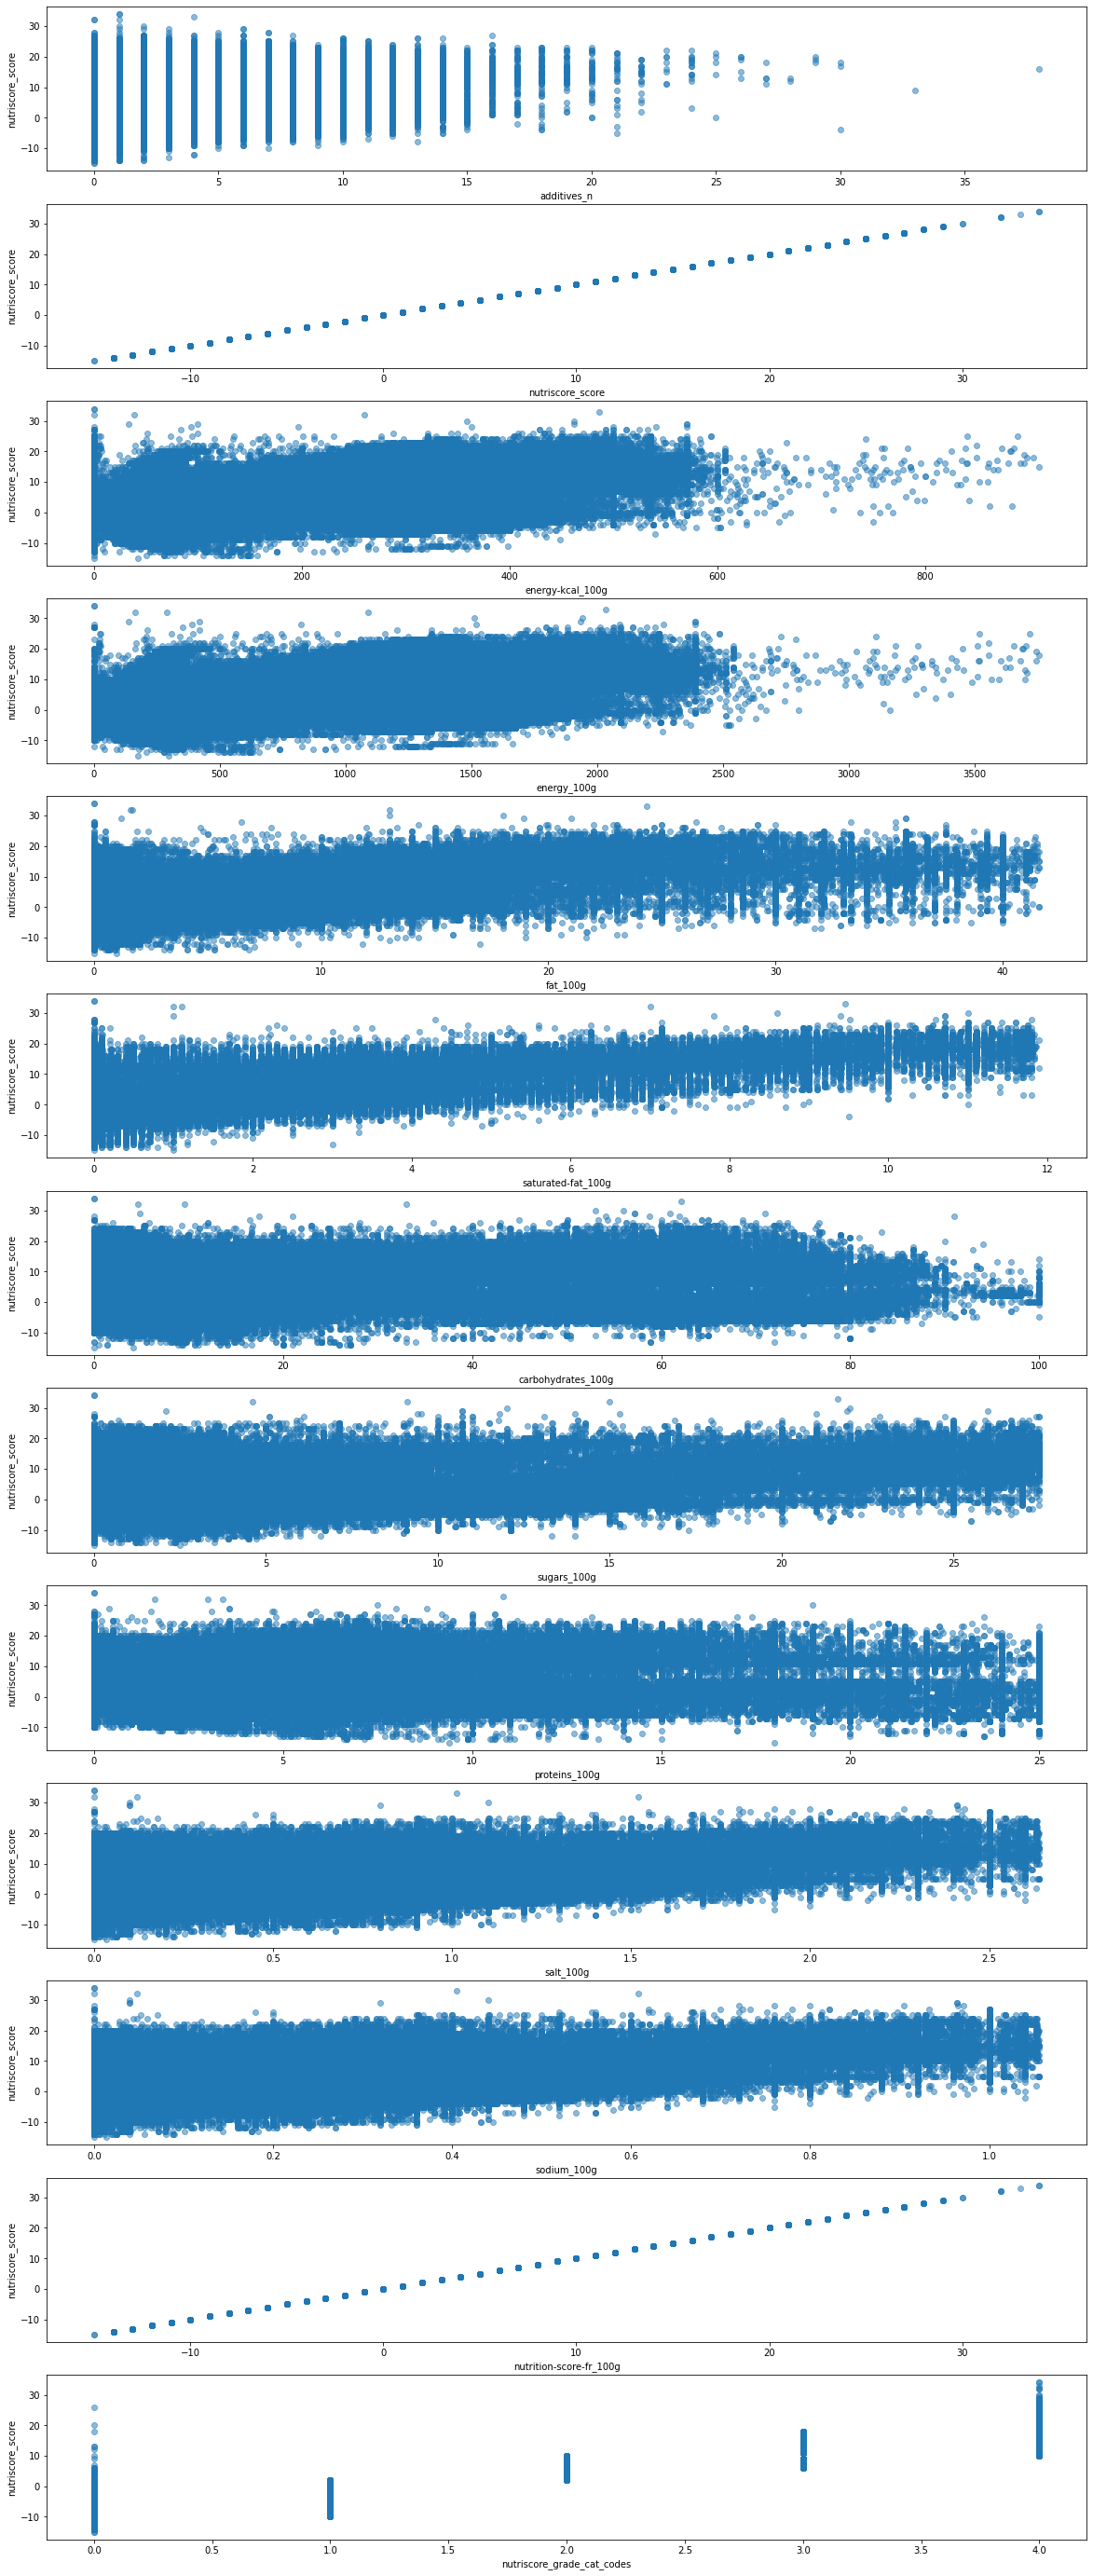

In [45]:
tmp_df = df.dropna()
plt.figure(figsize=(20,50))
size = tmp_df.select_dtypes('float').columns.size
for i, col in enumerate(df.select_dtypes('float')):
    plt.subplot(size, 1, i+1)
    plt.scatter(tmp_df[col], tmp_df['nutriscore_score'], alpha=0.5)
    plt.xlabel(col)
    plt.ylabel('nutriscore_score')
plt.show

# Conclusion

This analysis on the OpenFoodFact dataset showed that it exists a correlation between the nutriscore and the nutriments. A further analysis of regression may results in some good predictions.

The dataset is huge but the data quality is not very good : lots of features are empty, lots of values are Nan or 'unknown'.
